<a href="https://colab.research.google.com/github/Induvardhan116/Induvardhan116/blob/SML/SML_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

d= pd.read_csv('/content/GOOG.csv')
#print(d)
d=d.dropna()
print(d)

     symbol                       date    close      high        low     open  \
0      GOOG  2016-06-14 00:00:00+00:00   718.27   722.470   713.1200   716.48   
1      GOOG  2016-06-15 00:00:00+00:00   718.92   722.980   717.3100   719.00   
2      GOOG  2016-06-16 00:00:00+00:00   710.36   716.650   703.2600   714.91   
3      GOOG  2016-06-17 00:00:00+00:00   691.72   708.820   688.4515   708.65   
4      GOOG  2016-06-20 00:00:00+00:00   693.71   702.480   693.4100   698.77   
...     ...                        ...      ...       ...        ...      ...   
1253   GOOG  2021-06-07 00:00:00+00:00  2466.09  2468.000  2441.0725  2451.32   
1254   GOOG  2021-06-08 00:00:00+00:00  2482.85  2494.495  2468.2400  2479.90   
1255   GOOG  2021-06-09 00:00:00+00:00  2491.40  2505.000  2487.3300  2499.50   
1256   GOOG  2021-06-10 00:00:00+00:00  2521.60  2523.260  2494.0000  2494.01   
1257   GOOG  2021-06-11 00:00:00+00:00  2513.93  2526.990  2498.2900  2524.92   

       volume  adjClose   a

In [2]:
y=d['close']
y=y.dropna()
print(y)

0        718.27
1        718.92
2        710.36
3        691.72
4        693.71
         ...   
1253    2466.09
1254    2482.85
1255    2491.40
1256    2521.60
1257    2513.93
Name: close, Length: 1258, dtype: float64


In [3]:
x=d.drop('close',axis=1)
x=x.dropna()
print(x)

     symbol                       date      high        low     open   volume  \
0      GOOG  2016-06-14 00:00:00+00:00   722.470   713.1200   716.48  1306065   
1      GOOG  2016-06-15 00:00:00+00:00   722.980   717.3100   719.00  1214517   
2      GOOG  2016-06-16 00:00:00+00:00   716.650   703.2600   714.91  1982471   
3      GOOG  2016-06-17 00:00:00+00:00   708.820   688.4515   708.65  3402357   
4      GOOG  2016-06-20 00:00:00+00:00   702.480   693.4100   698.77  2082538   
...     ...                        ...       ...        ...      ...      ...   
1253   GOOG  2021-06-07 00:00:00+00:00  2468.000  2441.0725  2451.32  1192453   
1254   GOOG  2021-06-08 00:00:00+00:00  2494.495  2468.2400  2479.90  1253253   
1255   GOOG  2021-06-09 00:00:00+00:00  2505.000  2487.3300  2499.50  1006337   
1256   GOOG  2021-06-10 00:00:00+00:00  2523.260  2494.0000  2494.01  1561733   
1257   GOOG  2021-06-11 00:00:00+00:00  2526.990  2498.2900  2524.92  1262309   

      adjClose   adjHigh   

Text(0.5, 1.0, 'Google Stock Prediction')

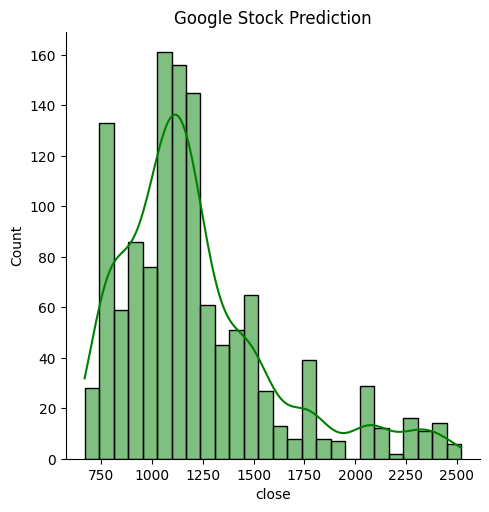

In [4]:
import seaborn as sns
sns.displot(d.close,kde=True,color='green')
plt.title("Google Stock Prediction")

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(d, test_size=20)

x_train = train.drop('close', axis=1)
x_train = x_train.iloc[:, :20]
x_train = x_train.dropna()

x_test = test.drop('close', axis=1)
x_test = x_test.iloc[:, :20]
x_test = x_test.dropna()

y_train = train['close']
y_train = y_train.dropna()

y_test = test['close']
y_test = y_test.dropna()


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

numerical_features = x_train.select_dtypes(include=['number']).columns
x_train_numerical = x_train[numerical_features]
x_test_numerical = x_test[numerical_features]

x_train_imputed = imputer.fit_transform(x_train_numerical)
x_test_imputed = imputer.transform(x_test_numerical)

x_train = pd.DataFrame(x_train_imputed, columns=numerical_features, index=x_train.index)
x_test = pd.DataFrame(x_test_imputed, columns=numerical_features, index=x_test.index)

y_train = y_train.values.reshape(-1, 1)
y_train = imputer.fit_transform(y_train).ravel()

print(x_train.shape)
print(y_train.shape)

min_samples = min(x_train.shape[0], y_train.shape[0])
x_train = x_train[:min_samples]
y_train = y_train[:min_samples]

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

(1238, 11)
(1238,)


LinearRegression()

In [7]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(x_train, y_train)

SVR()

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)



print(x_train.shape)
print(y_train.shape)


min_samples = min(x_train.shape[0], y_train.shape[0])
x_train = x_train[:min_samples]
y_train = y_train[:min_samples]

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

from sklearn.svm import SVR
model_svr = SVR()


model_svr.fit(x_train, y_train)

y_pred_train = model_svr.predict(x_train)

min_samples_test = min(x_test.shape[0], y_test.shape[0])
x_test = x_test[:min_samples_test]
y_test = y_test[:min_samples_test]

y_pred_test= model_svr.predict(x_test)

print(f'train data MSE score SVR: {mean_squared_error(y_train,y_pred_train )}')
print(f'train data MAE score SVR: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score SVR: {root_mean_squared_error(y_train,y_pred_train )}')



print()
print(f'test data MSE score SVR: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score SVR: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score SVR: {root_mean_squared_error(y_test, y_pred_test)}')
print()

(1238, 11)
(1238,)
train data MSE score SVR: 154357.76471281503
train data MAE score SVR: 271.39805906423726
train data RMSE score SVR: 392.8839074240825

test data MSE score SVR: 86506.89390876907
test data MAE score SVR: 238.56574710942544
test data RMSE score SVR: 294.1205431600606



In [9]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

Lasso()

In [10]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)


y_pred_lasso = model_lasso.predict(x_test)
y_pred_ridge = model_ridge.predict(x_test)

y_pred_lasso1 = model_lasso.predict(x_train)
y_pred_ridge1 = model_ridge.predict(x_train)

print(f'test data MSE score lasso: {mean_squared_error(y_test,y_pred_lasso)}')
print(f'test data MAE score lasso: {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'test data RMSE score lasso: {root_mean_squared_error(y_test, y_pred_lasso)}')
print()
print(f'train data MSE score lasso: {mean_squared_error(y_train,y_pred_lasso1)}')
print(f'train data MAE score lasso: {mean_absolute_error(y_train,y_pred_lasso1 )}')
print(f'train data RMSE score lasso: {root_mean_squared_error(y_train,y_pred_lasso1)}')
print()

test data MSE score lasso: 16.250858400771456
test data MAE score lasso: 2.9338175690149795
test data RMSE score lasso: 4.03123534425509

train data MSE score lasso: 20.267041008373006
train data MAE score lasso: 3.0516593992105703
train data RMSE score lasso: 4.501893047193925



In [11]:
from sklearn.linear_model import Lasso, Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)

Ridge()

In [12]:
print(f'train data MSE score ridge: {mean_squared_error(y_train,y_pred_ridge1)}')
print(f'train data MAE score ridge: {mean_absolute_error(y_train,y_pred_ridge1 )}')
print(f'train data RMSE score ridge: {root_mean_squared_error(y_train,y_pred_ridge1)}')
print()
print(f'test data MSE score ridge: {mean_squared_error(y_test,y_pred_ridge)}')
print(f'test data MAE score ridge: {mean_absolute_error(y_test,y_pred_ridge )}')
print(f'test data RMSE score ridge: {root_mean_squared_error(y_test,y_pred_ridge)}')
print()

train data MSE score ridge: 1.1714354857371375e-08
train data MAE score ridge: 7.440169592182987e-05
train data RMSE score ridge: 0.00010823287327504234

test data MSE score ridge: 7.804983932754265e-09
test data MAE score ridge: 6.805761616988094e-05
test data RMSE score ridge: 8.834582012044636e-05



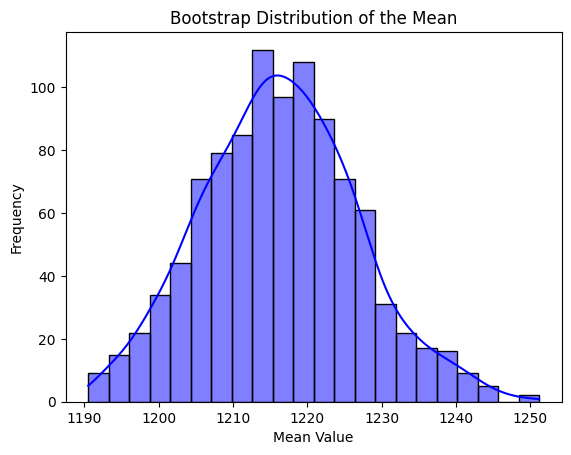

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
y = d['close'].dropna()
def bootstrap_mean(data, n_bootstrap=1000):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return means
bootstrap_means = bootstrap_mean(y)
sns.histplot(bootstrap_means, kde=True, color='blue')
plt.title("Bootstrap Distribution of the Mean")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")
plt.show()
